In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import missingno as msno

In [2]:
#Verinin okunması
df_nyc = pd.read_csv('AB_NYC_2019.csv')

In [3]:
#Veri setinin ilk 10 satırının gösterilmesi
df_nyc.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
df_nyc.shape

(48895, 16)

In [5]:
#Verideki değişkenlerin tipinin belirlenmesi
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
#Verideki kolonların isimlerinin gösterilmesi
df_nyc.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df_nyc.index

RangeIndex(start=0, stop=48895, step=1)

In [8]:
df_nyc.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [9]:
#Name kolonundaki unique değerlerin gösterilmesi
df_nyc["name"].unique()

array(['Clean & quiet apt home by the park', 'Skylit Midtown Castle',
       'THE VILLAGE OF HARLEM....NEW YORK !', ...,
       'Sunny Studio at Historical Neighborhood',
       '43rd St. Time Square-cozy single bed',
       "Trendy duplex in the very heart of Hell's Kitchen"], dtype=object)

In [10]:
#Name kolonundaki unique değerlerin sayısının gösterilmesi
df_nyc["name"].value_counts()

name
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: count, Length: 47905, dtype: int64

In [11]:
#Verideki boş değerlerin gösterilmesi
df_nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
#Verideki boş değerlerin yüzdelikleri
na_columns = [col for col in df_nyc.columns if df_nyc[col].isnull().sum() > 0]
n_miss_ratio = np.round((df_nyc[na_columns].isnull().sum() / df_nyc.shape[0] * 100).sort_values(ascending=False), 2)
n_miss_ratio

last_review          20.56
reviews_per_month    20.56
host_name             0.04
name                  0.03
dtype: float64

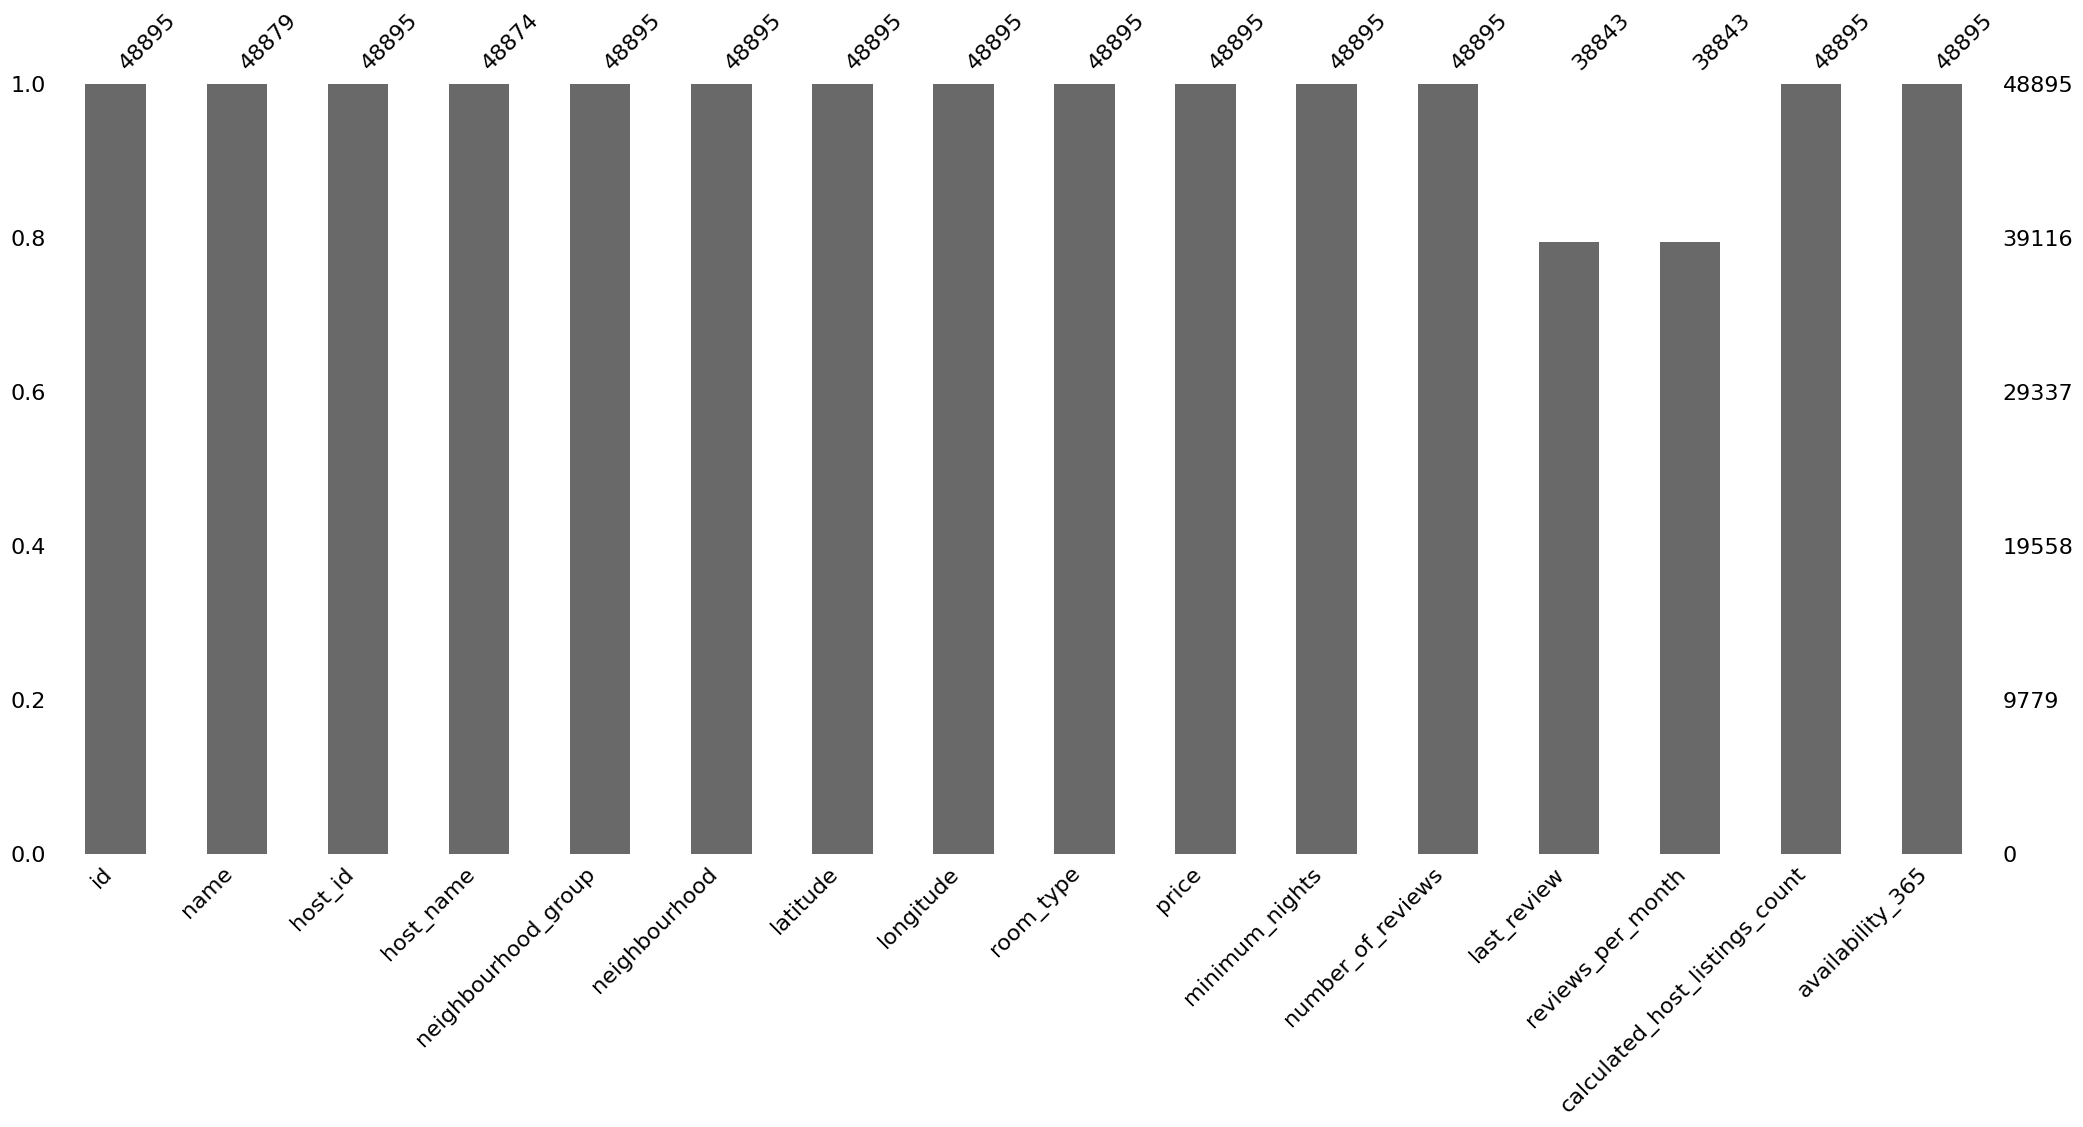

In [13]:
#Boş değerlerin görselleştirilmesi
msno.bar(df_nyc)
plt.show()

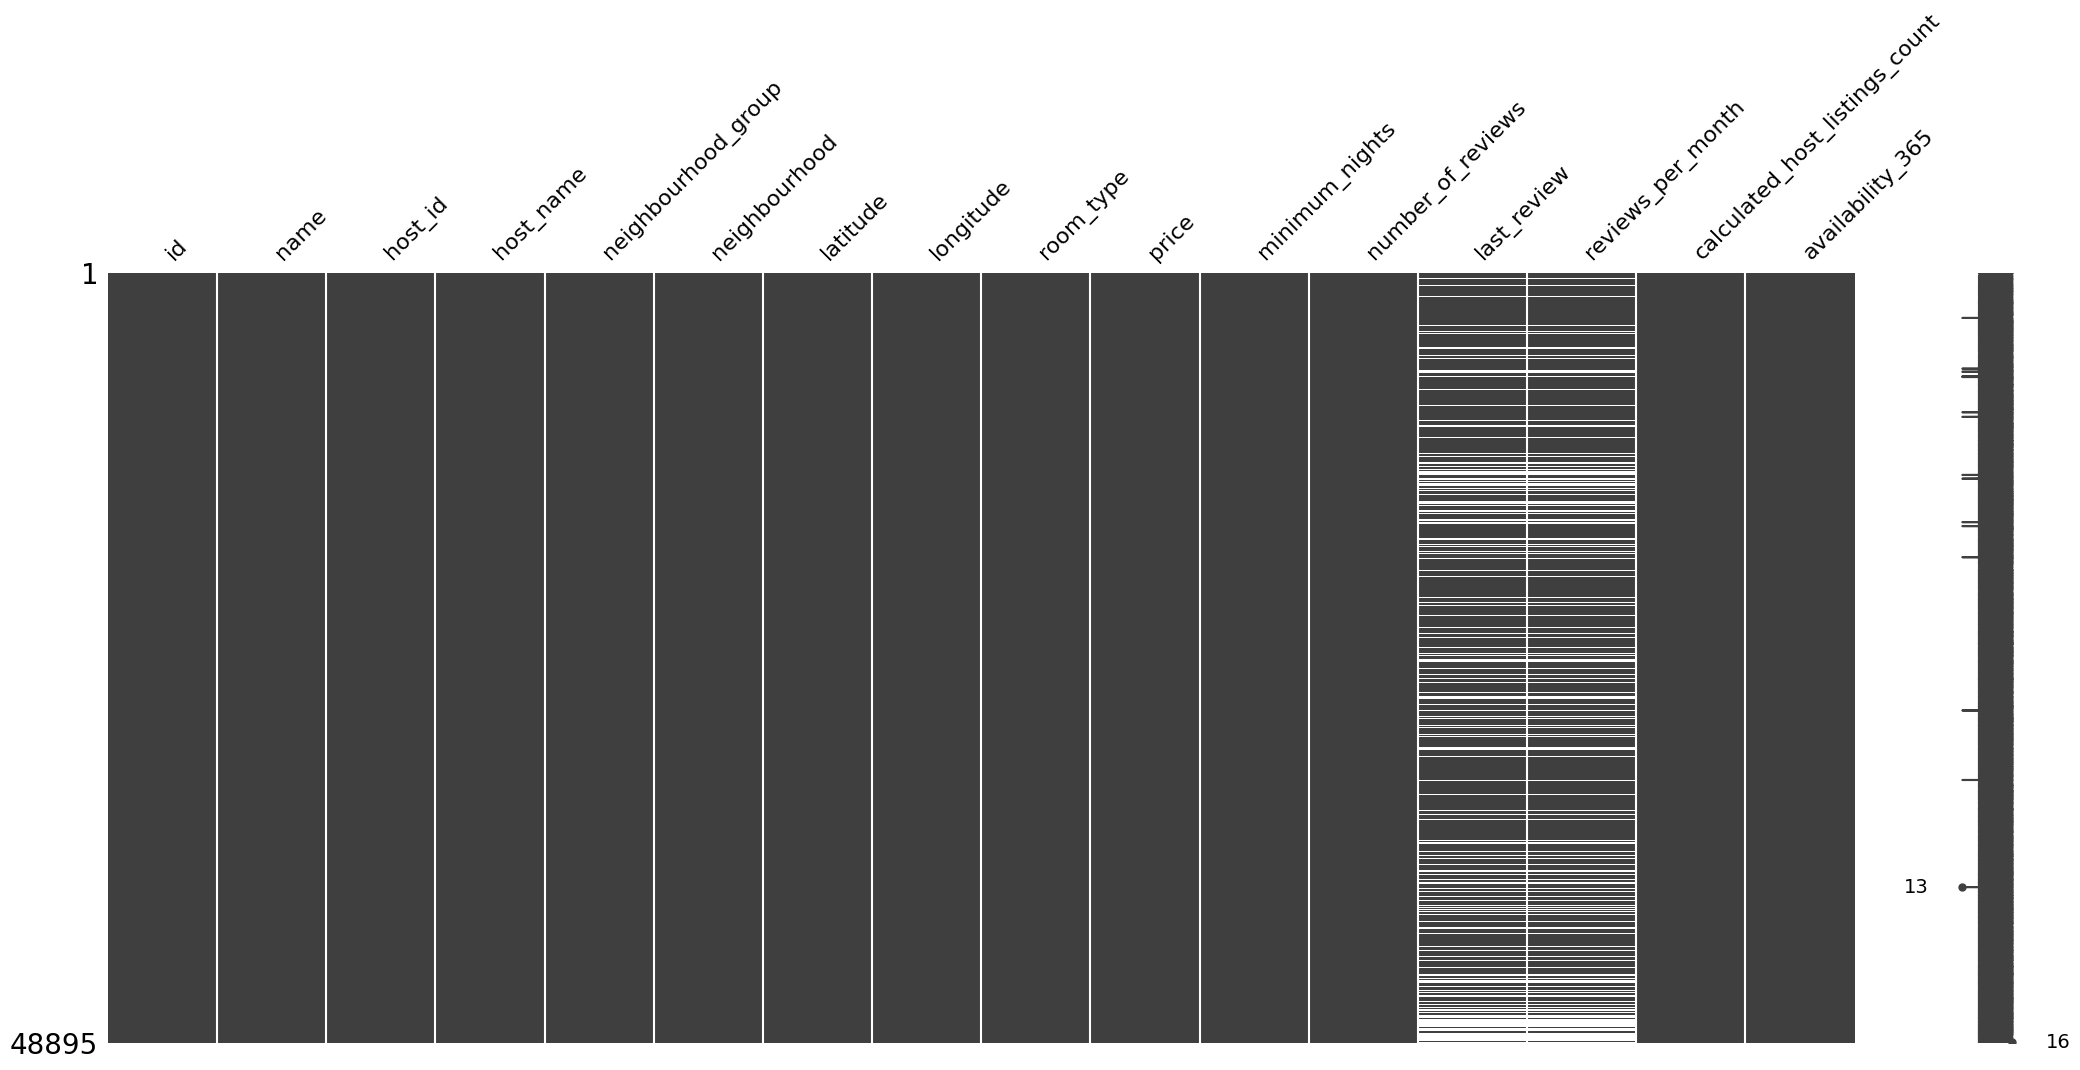

In [14]:
#Boş değerlerin görselleştirilmesi
msno.matrix(df_nyc)
plt.show()

In [15]:
#id, host_name ve last_review değişkenleri analiz için gereksiz olduğu için veri setinden çıkarıldı.
#Ayrıca review_per_month değişkeninde ki boşluklar 0 ile doldurulabilir çünkü o ay hiç review yapılmamış demektir.

df_nyc.drop(["id", "host_name", "last_review"], axis=1, inplace=True)
df_nyc["reviews_per_month"].fillna(0, inplace=True)

In [16]:
#Verinin son hali
df_nyc.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

<Axes: title={'center': 'Correlation Matrix'}>

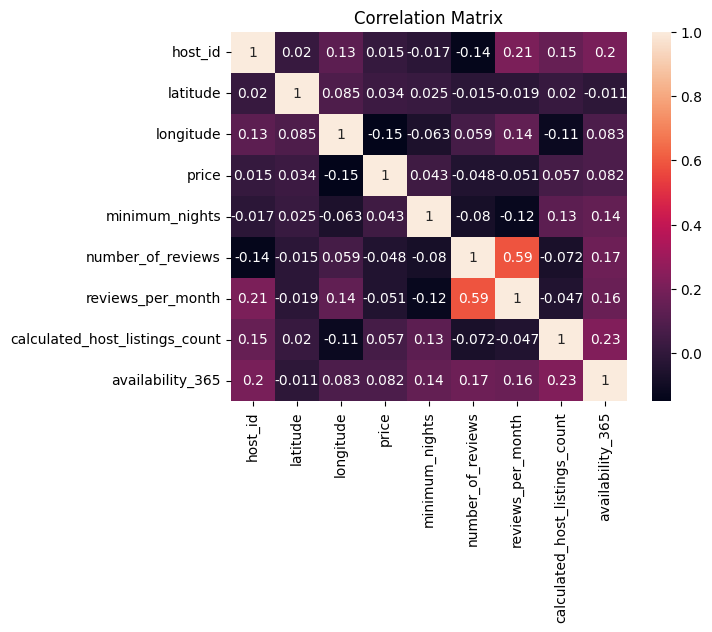

In [17]:
#Correlasyon matrisini sadece numeric değişkenler için çizdiriyoruz.
df_nyc_numeric = df_nyc.select_dtypes(include=["float64", "int64"])
df_nyc_numeric.head()


plt.title("Correlation Matrix")
sns.heatmap(df_nyc_numeric.corr(), annot=True)

Correlasyon matrisindeki değerlerin mutlak değerleri 0.5'den büyük olan değişkenler arasında pozitif yönlü orta düzeyde bir ilişki olduğu görülmektedir.
Correlasyon matrisindeki değerlerin mutlak değerleri 0.5'den küçük olan değişkenler arasında ise ilişki yok denecek kadar azdır.

number_of_reviews ve review_per_month arasındaki pozitif korelasyonun nedeni görüntüleme sayısı ile aylık görüntüleme sayısı arasındaki ilişkidir, yüksek korelasyondan dolayı bu değerler silinebilir.

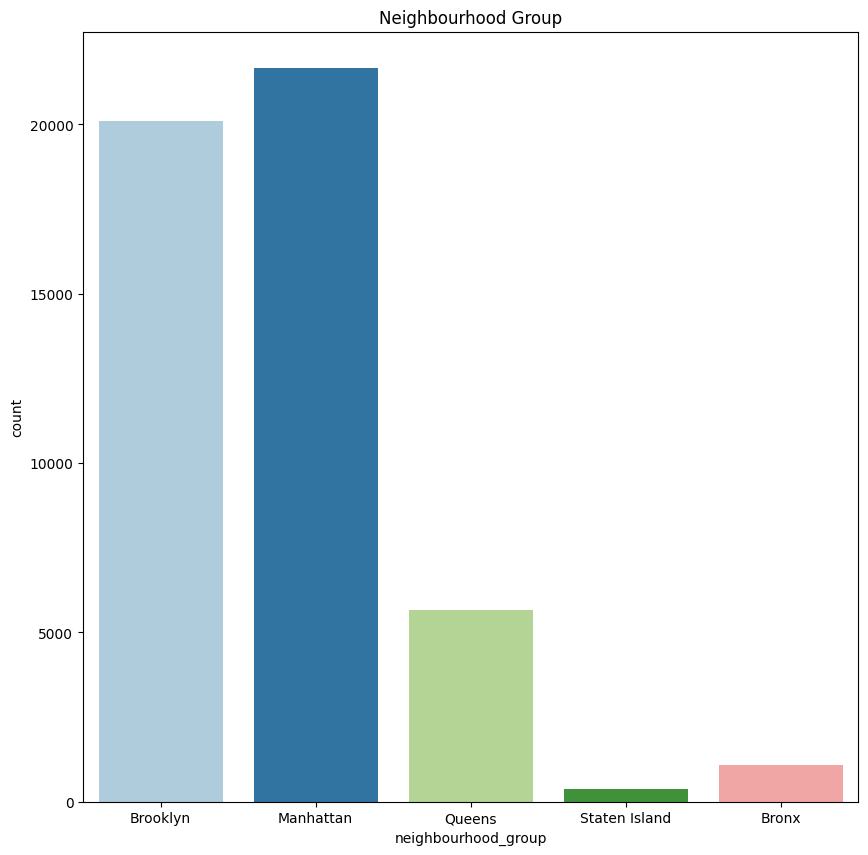

In [18]:
#Neighbourhood_group değişkeninin görselleştirilmesi
sns.countplot(x = df_nyc['neighbourhood_group'], palette="Paired")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')
plt.show()

In [19]:
#Neighbourhood Group ve room_type'a göre fiyat ortalamaları
df_nyc.groupby(['neighbourhood_group','room_type'])['price'].mean().sort_values(ascending=False)

neighbourhood_group  room_type      
Manhattan            Entire home/apt    249.239109
Brooklyn             Entire home/apt    178.327545
Staten Island        Entire home/apt    173.846591
Queens               Entire home/apt    147.050573
Bronx                Entire home/apt    127.506596
Manhattan            Private room       116.776622
                     Shared room         88.977083
Brooklyn             Private room        76.500099
Queens               Private room        71.762456
                     Shared room         69.020202
Bronx                Private room        66.788344
Staten Island        Private room        62.292553
Bronx                Shared room         59.800000
Staten Island        Shared room         57.444444
Brooklyn             Shared room         50.527845
Name: price, dtype: float64

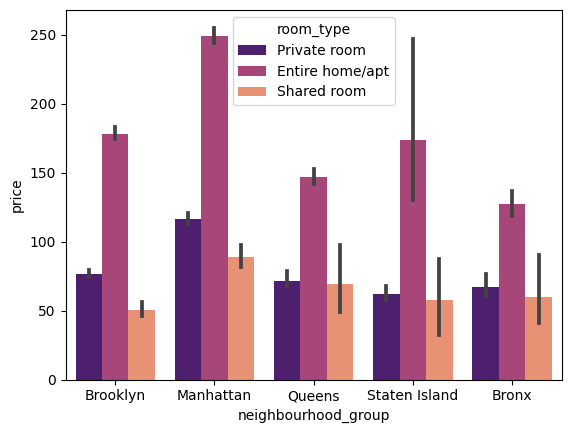

<Figure size 1000x1000 with 0 Axes>

In [20]:
#Neighbourhood Group ve room_type'a göre fiyat ortalamaları görselleştirilmesi
sns.barplot(x ='neighbourhood_group',y = 'price' ,hue = 'room_type' ,data = df_nyc, palette ="magma")
plt.figure(figsize=(10, 10))
plt.show()

Manhattan'da her room_type fiyatlarının- diğer neighbourhoodlara göre daha yüksek olduğu görülmektedir.

Text(0, 0.5, 'Number of Airbnb')

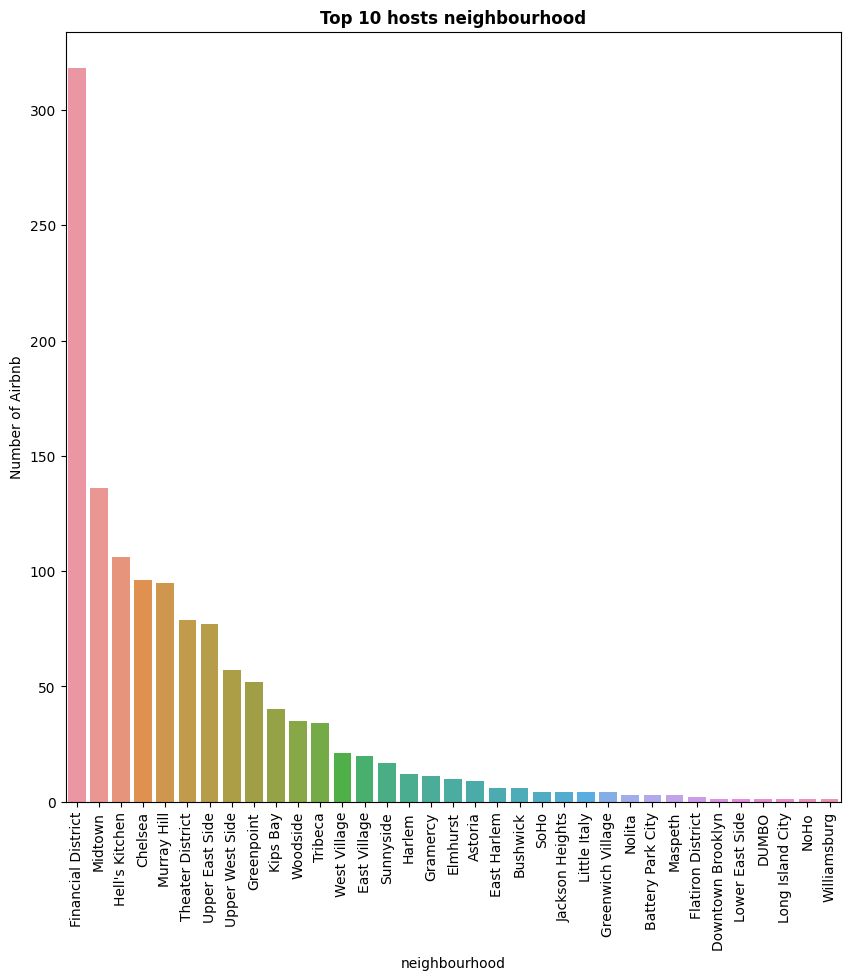

In [21]:
#top 10 hosts neighbourhood
top10_host = df_nyc.host_id.value_counts().head(10).index
top10_host_vis=df_nyc.loc[df_nyc['host_id'].isin(top10_host)]

#top 10 hosts neighbourhood görselleştirilmesi
plt.figure(figsize=(10,10))
sns.countplot(data=top10_host_vis,x='neighbourhood',order = top10_host_vis['neighbourhood'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Top 10 hosts neighbourhood",weight='bold')
plt.ylabel('Number of Airbnb')

Grafikten de anlaşılacağı üzere financial district bölgesinde daha fazla airbnb bulunmakta.Bu bölgelerin daha çok tercih etmesiyle doğru orantılı olarak değerlendirebiliriz.

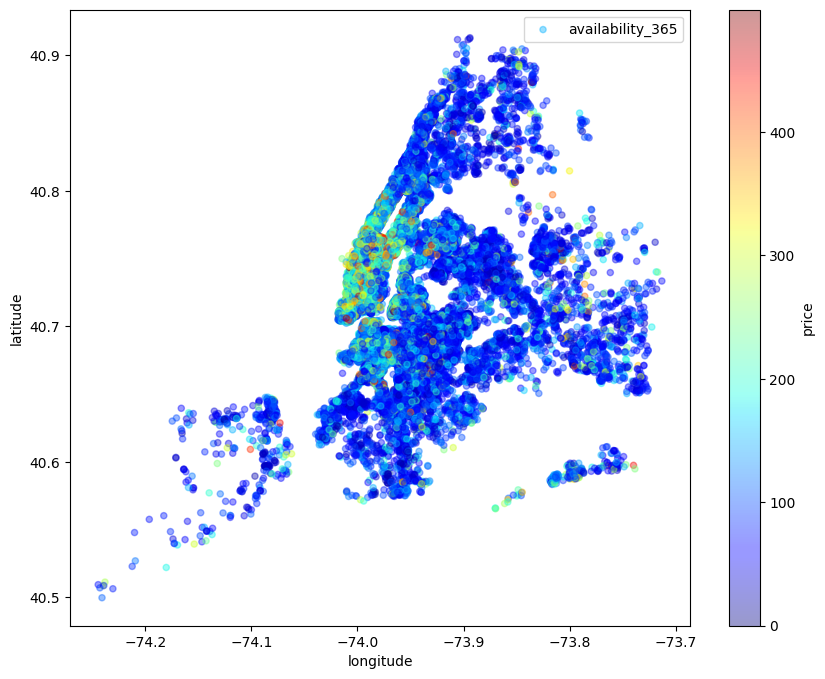

In [22]:
#Avaibility 365 ve price arasındaki ilişki
avaibility = df_nyc[df_nyc.price < 500].plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
avaibility.legend()

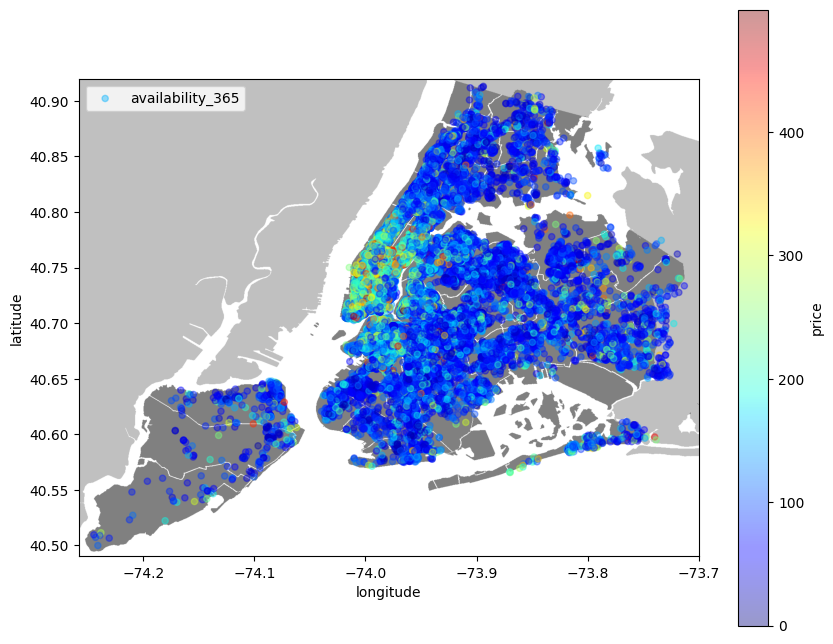

In [23]:
import urllib
#Görsele NYC haritasının eklenmesini
#avaibility 365 ve price arasındaki ilişki görselleştirilmesi (NYC haritası üzerinde)
plt_nyc= df_nyc[df_nyc.price < 500]

# Initializing the figure size
plt.figure(figsize=(10, 8))

#Google'da bulunan png NYC görüntüsünün indirilmesi ve yerel bir dosyaya kaydedilmesi
url = 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'
local_filename, _ = urllib.request.urlretrieve(url, filename='nyc_image.png')

# Local'e kaydedilen NYC görüntüsünün okunması
nyc_img = plt.imread(local_filename)

# Görselin çıktıya uygun olacak şekilde ayarlanması
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
ax = plt.gca()

plt_nyc.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax,
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

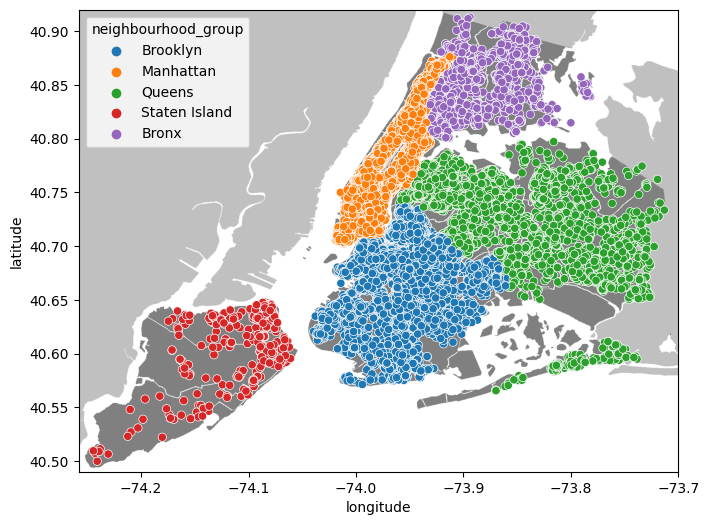

In [24]:
#Bölgelerdeki evlerin dağılımı
plt.figure(figsize=(10, 6))
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
sns.scatterplot(x=df_nyc.longitude, y=df_nyc.latitude, hue=df_nyc.neighbourhood_group)
plt.show()

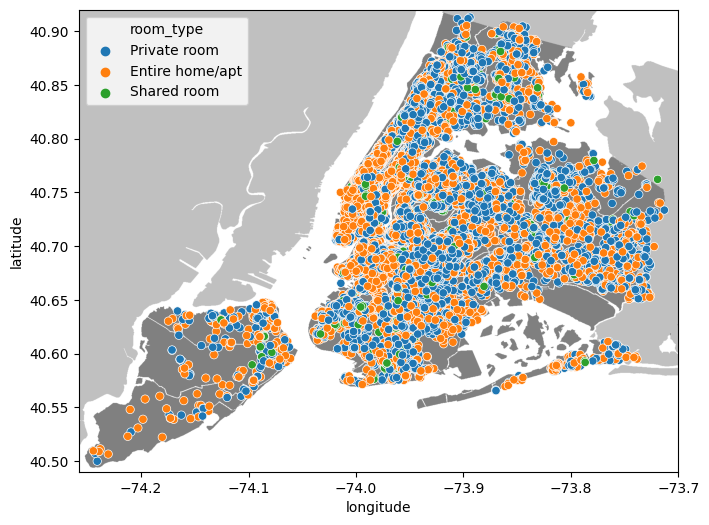

In [25]:
#Bölgelerdeki room_type dağılımı
plt.figure(figsize=(10,6))
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
sns.scatterplot(x=df_nyc.longitude, y=df_nyc.latitude,hue=df_nyc.room_type)
plt.show()

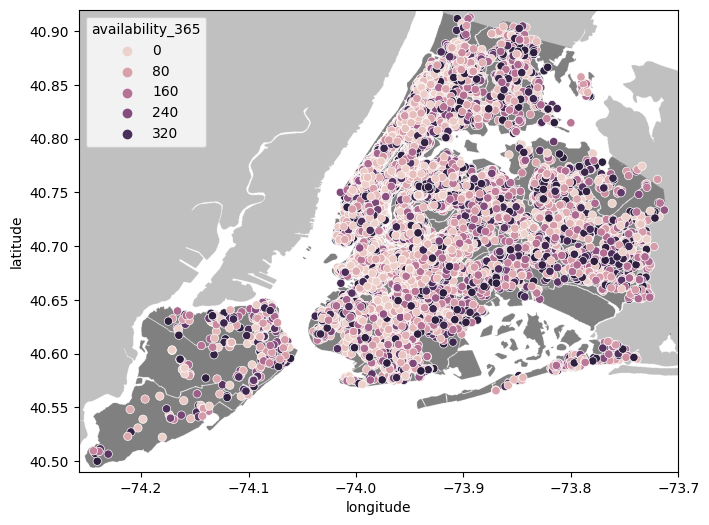

In [26]:
#Bölgelerdeki uygun evlerin dağılımı
plt.figure(figsize=(10,6))
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
sns.scatterplot(x=df_nyc.longitude,y=df_nyc.latitude,hue=df_nyc.availability_365)
plt.show()

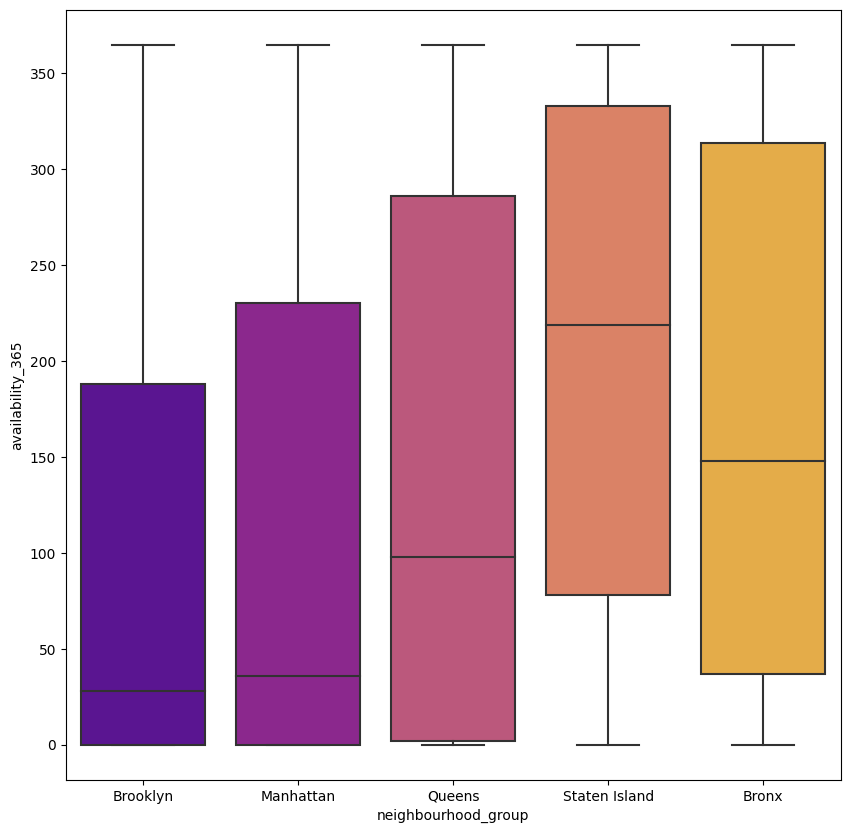

In [27]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_nyc, x='neighbourhood_group',y='availability_365',palette='plasma')

Aykırı değerler gözlenmemektedir. Staten Island için medyan değeri diğerlerinden daha yüksek gözükmektedir.

In [28]:
top_reviewed_listings=df_nyc.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [29]:
#Top 10 reviewed listings 
top_host = df_nyc.host_id.value_counts().head(10)
top_host


host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

In [30]:
top_host = df_nyc['host_id'].value_counts().head(10)
top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.columns = ['host_id', 'number_of_listings']
top_host_df

,host_id,number_of_listings
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


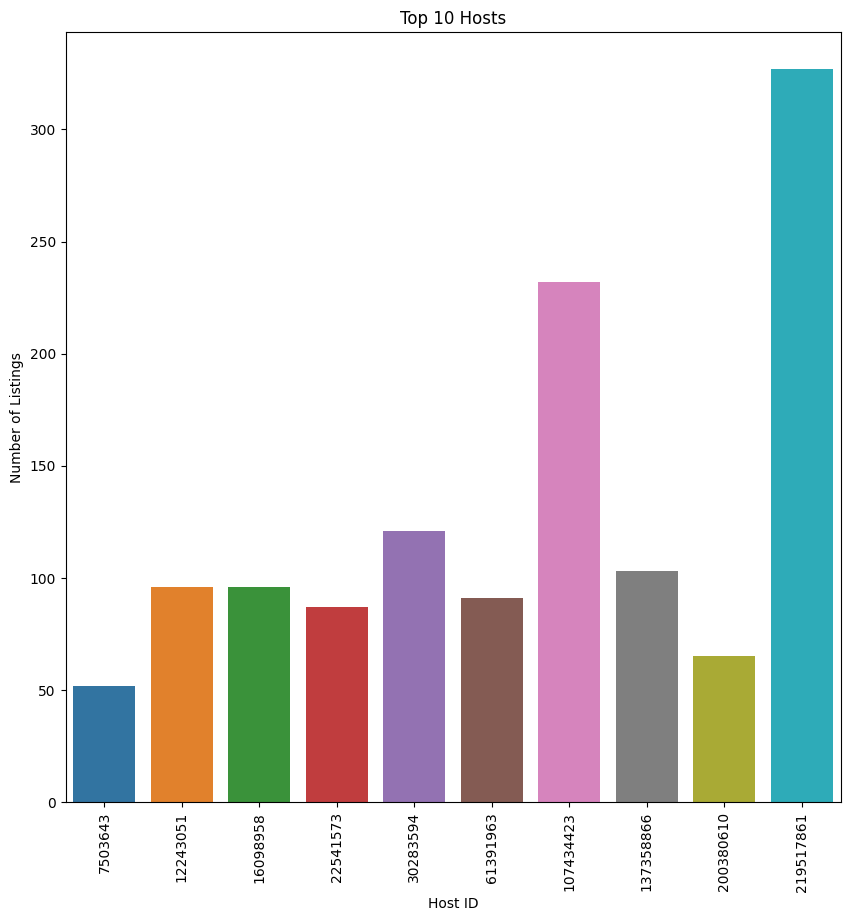

In [31]:
#Top 10 host'un görsel ile ifade edilmesi
plt.figure(figsize=(10,10))
sns.barplot(x='host_id', y='number_of_listings', data=top_host_df)
plt.title('Top 10 Hosts')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90)
plt.show()


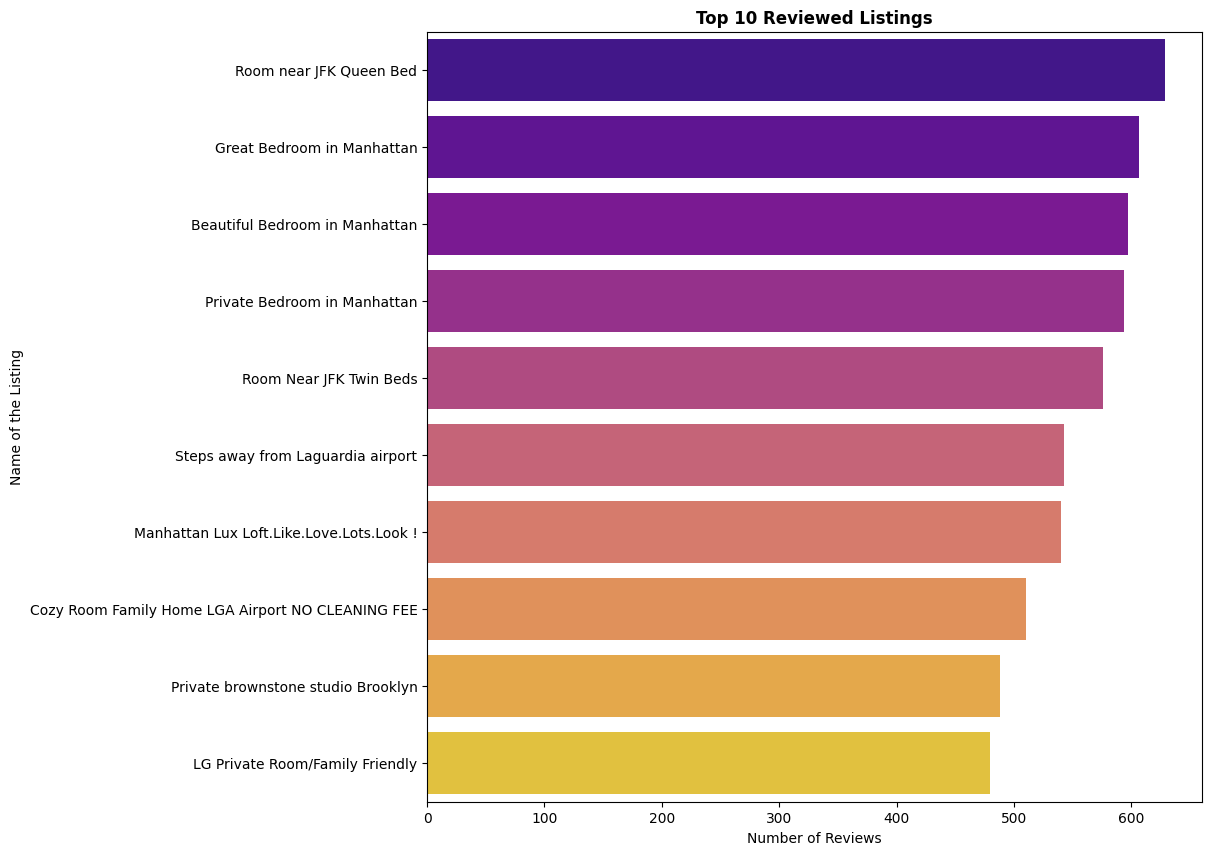

In [32]:
#Listelerin en çok review alanları
plt.figure(figsize=(10,10))
sns.barplot(data=top_reviewed_listings,x='number_of_reviews',y='name',palette='plasma')
plt.title('Top 10 Reviewed Listings',weight='bold')
plt.xlabel('Number of Reviews')
plt.ylabel('Name of the Listing')
plt.show()


Grafikte en çok review alan isimler görülmektedir.

In [33]:
#Top 10 neighbourhoods
top10_neighbourhoods = df_nyc.neighbourhood.value_counts().head(10)
top10_neighbourhoods

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64

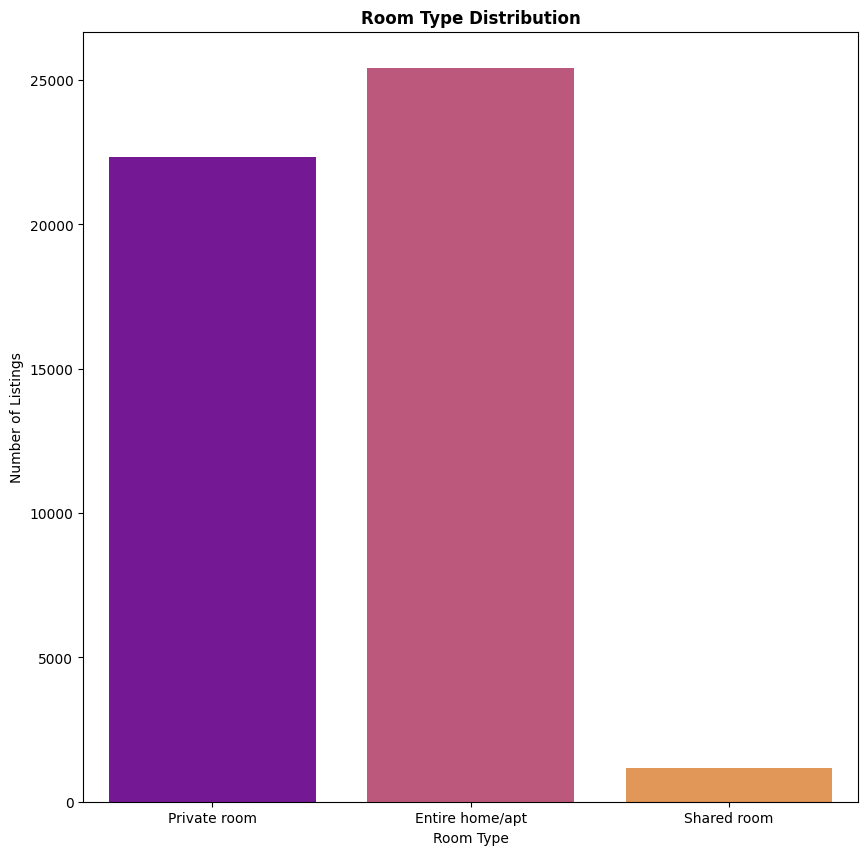

In [34]:
#Room type dağılımı
plt.figure(figsize=(10,10))
sns.countplot(data=df_nyc,x='room_type',palette='plasma')
plt.title('Room Type Distribution',weight='bold')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

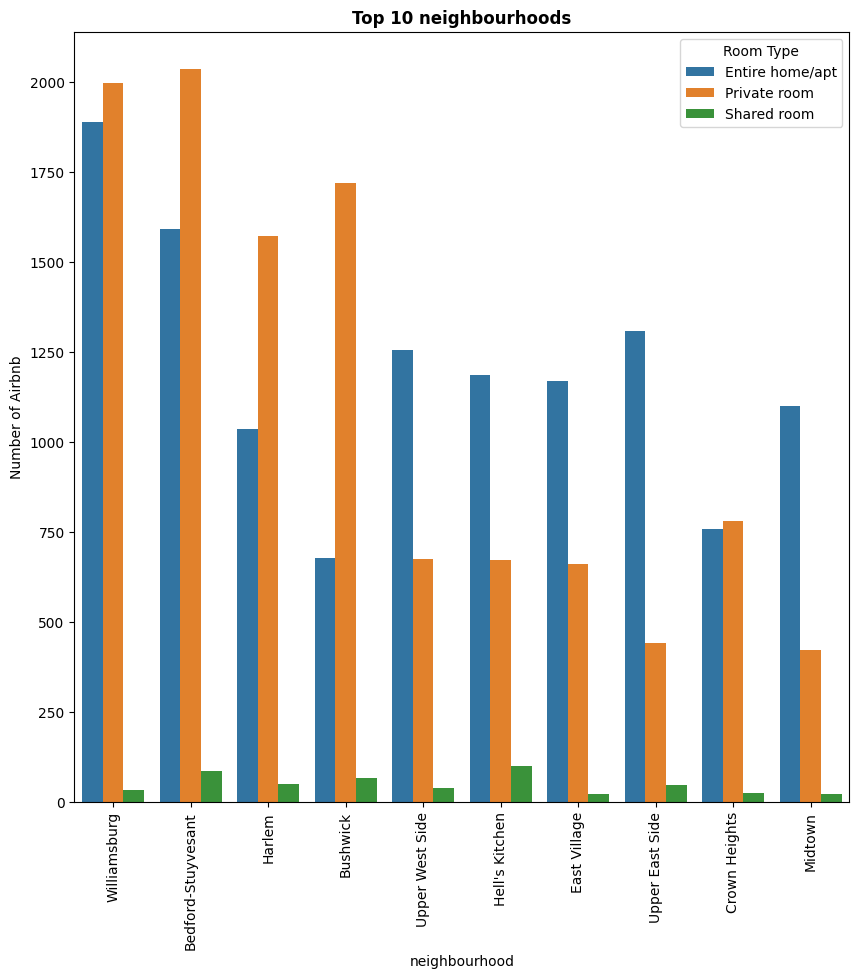

In [35]:
#Room type ve neighbourhood_group'a göre price ortalamaları
# 'room_type' sütununun DataFrame'inizde oda tipini belirten sütun olduğunu varsayarsak

plt.figure(figsize=(10, 10))
top10_neighbourhoods = df_nyc.neighbourhood.value_counts().head(10).index
top10_neighbourhoods_vis = df_nyc.loc[df_nyc['neighbourhood'].isin(top10_neighbourhoods)]

sns.countplot(data=top10_neighbourhoods_vis, x='neighbourhood', hue='room_type', order=top10_neighbourhoods_vis['neighbourhood'].value_counts().index)

plt.xticks(rotation=90)
plt.title("Top 10 neighbourhoods", weight='bold')
plt.ylabel('Number of Airbnb')
plt.legend(title='Room Type', loc='upper right')  # Add a legend for room_type
plt.show()


<Figure size 2000x1500 with 0 Axes>

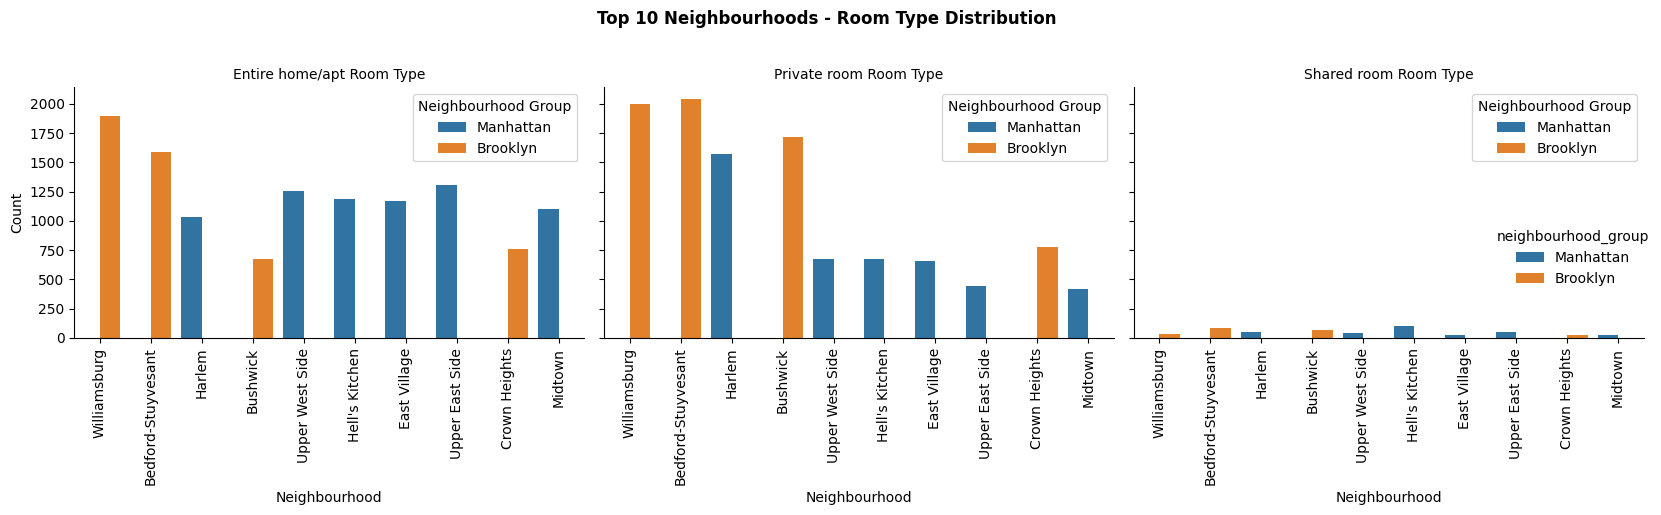

In [36]:
#Top 10 neighbourhoods - Room Type dağılımı
# 'room_type' sütununun DataFrame'inizde oda tipini belirten sütun olduğunu varsayarsak

# Üç alt grafiği barındırmak için şekil boyutunu ayarlandı
plt.figure(figsize=(20, 15))  

top10_neighbourhoods = df_nyc.neighbourhood.value_counts().head(10).index
top10_neighbourhoods_vis = df_nyc.loc[df_nyc['neighbourhood'].isin(top10_neighbourhoods)]

# Her oda tipi için üç ayrı alt grafik oluşturuldu
g = sns.catplot(data=top10_neighbourhoods_vis, x='neighbourhood', col='room_type', kind='count', col_wrap=3,
                hue='neighbourhood_group', order=top10_neighbourhoods_vis['neighbourhood'].value_counts().index)

# Daha iyi okunabilirlik için x ekseni etiketleri 90 derece döndürüldü
g.set_xticklabels(rotation=90)

# Her alt grafik için başlıklar ve etiketler ayarlandı
g.set_titles("{col_name} Room Type")
g.set_axis_labels('Neighbourhood', 'Count')

# Legend her alt grafik için eklendi
for ax in g.axes.flat:
    ax.legend(title='Neighbourhood Group', loc='upper right')

plt.suptitle("Top 10 Neighbourhoods - Room Type Distribution", y=1.02, weight='bold')
plt.tight_layout()
plt.show()


In [37]:
#Oda tipine göre minimum gece sayısı
df_nyc.groupby('room_type').agg( {'minimum_nights': lambda minimum_nights: minimum_nights.sum()})

,minimum_nights
room_type,
Entire home/apt,216152
Private room,120067
Shared room,7511


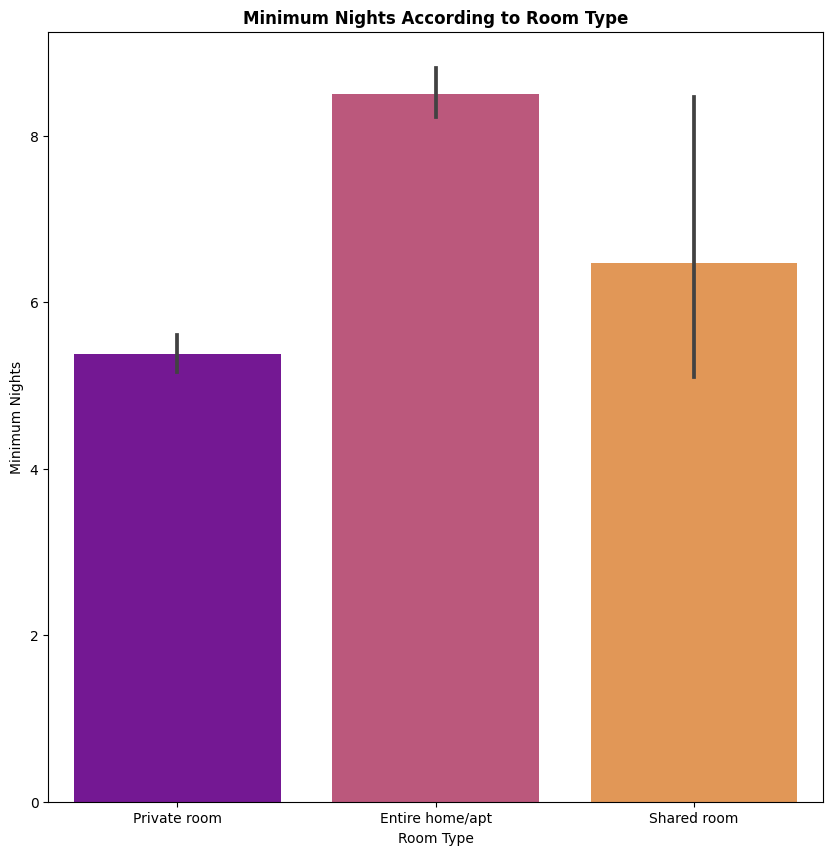

In [38]:
#Yukarıdaki tabloyu görselleştirme
plt.figure(figsize=(10,10))
sns.barplot(data=df_nyc,x='room_type',y='minimum_nights',palette='plasma')
plt.title('Minimum Nights According to Room Type',weight='bold')
plt.xlabel('Room Type')
plt.ylabel('Minimum Nights')
plt.show()

In [39]:
#Room type'a göre price ortalamaları
df_nyc.loc[(df_nyc["neighbourhood_group"] == "Manhattan")].groupby("room_type").agg({"price": "mean"})

,price
room_type,
Entire home/apt,249.239109
Private room,116.776622
Shared room,88.977083


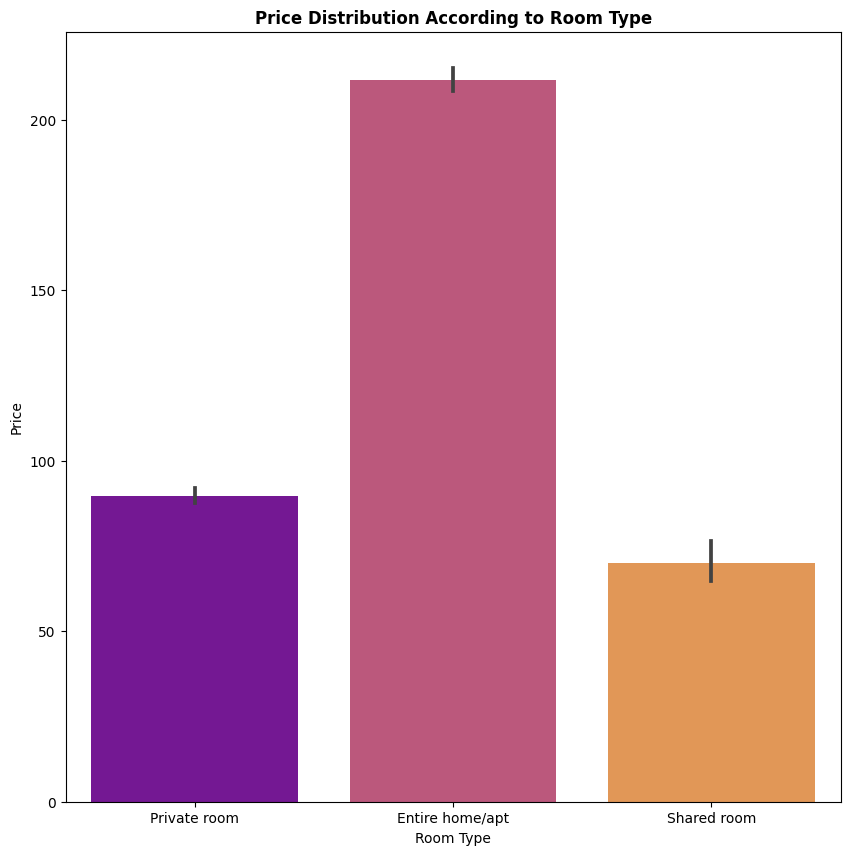

In [40]:
#Room type'a göre price ortalamaları görselleştirilmesi
plt.figure(figsize=(10,10))
sns.barplot(data=df_nyc,x='room_type',y='price',palette='plasma')
plt.title('Price Distribution According to Room Type',weight='bold')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()
